In [10]:
import numpy as np
import astropy.table as tbl
import matplotlib.pyplot as plt
import json
import astropy.time as time

In [5]:
spec = tbl.Table.read('tns_2019odp_2019-08-23_05-23-25_ESO-NTT_EFOSC2-NTT_ePESSTO+.asci', format='ascii')
redshift = 0.014353
wave = spec['col1']
flux = spec['col2']

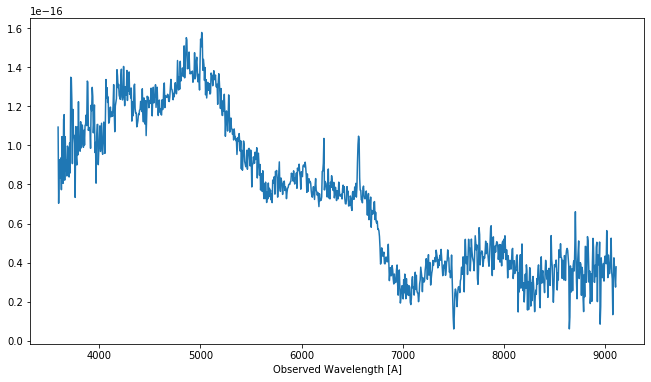

In [6]:
plt.figure(figsize=(11,6))
plt.plot(wave/(1+redshift), flux)
plt.xlabel('Observed Wavelength [A]')
plt.savefig('2020-01-14-early-spec-2019-08-23.png')

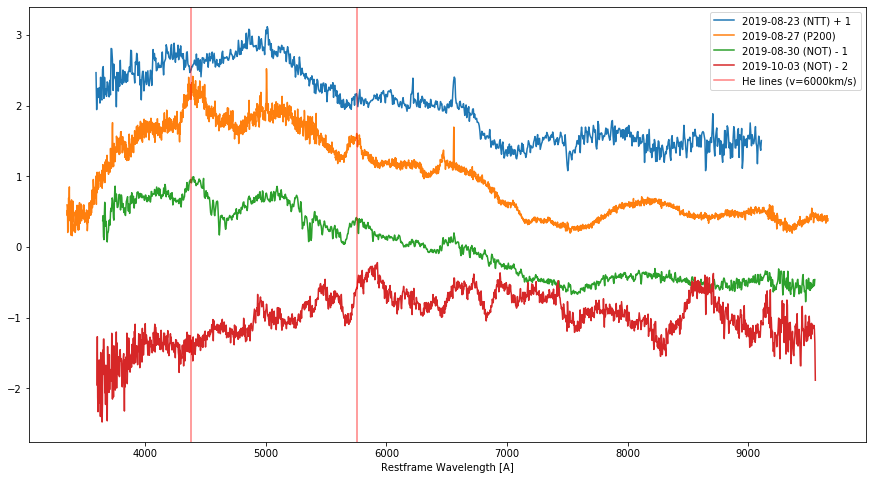

In [26]:
#spec2 = tbl.Table.read('ZTF19abqwtfu_20190830_NOT_v1.ascii', format='ascii')
spec2 = tbl.Table.read('ZTF19abqwtfu_20190827_P200_v1.ascii', format='ascii')
wave2 = spec2['col1']
flux2 = spec2['col2']
idx2 = wave2 < 9800

spec3 = tbl.Table.read('ZTF19abqwtfu_20190830_NOT_v1.ascii', format='ascii')
wave3 = spec3['col1']
flux3 = spec3['col2']

spec4 = tbl.Table.read('../data/specs/ZTF19abqwtfu_20191003_NOT_v1.ascii', format='ascii')
wave4 = spec4['col1']
flux4 = spec4['col2']

plt.figure(figsize=(15,8))
plt.plot(wave/(1+redshift), flux/np.nanmean(flux)+1, label='2019-08-23 (NTT) + 1')
plt.plot(wave2[idx2]/(1+redshift), flux2[idx2]/np.nanmean(flux2[idx2]), label='2019-08-27 (P200)')
plt.plot(wave3/(1+redshift), flux3/np.nanmean(flux3)-1, label='2019-08-30 (NOT) - 1')
plt.plot(wave4/(1+redshift), flux4/np.nanmean(flux4)-2, label='2019-10-03 (NOT) - 2')
plt.xlabel('Restframe Wavelength [A]')
for he_line in [5876, 4472]:
    he_v = 6000
    z = 1-he_v/300e3
    lbl = None
    if he_line == 5876:
        lbl = 'He lines (v=%dkm/s)' % he_v
    plt.axvline(x=he_line*z, label=lbl, c='red', alpha=0.5)
#plt.axvline(x=5876, c='red', label='He lines')
#plt.axvline(x=4472, c='red')
plt.legend()
plt.savefig('2020-01-14-early-spec-2019-08-23.png')

In [4]:
s = tbl.Table.read('sn98bw_t+4', format='ascii')

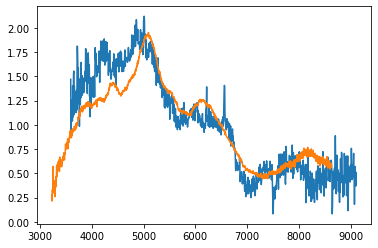

In [5]:
plt.plot(wave/(1+redshift), flux/np.mean(flux))
plt.plot(s['wavelength']/(1+0.0385), s['flux']/np.mean(s['flux']))

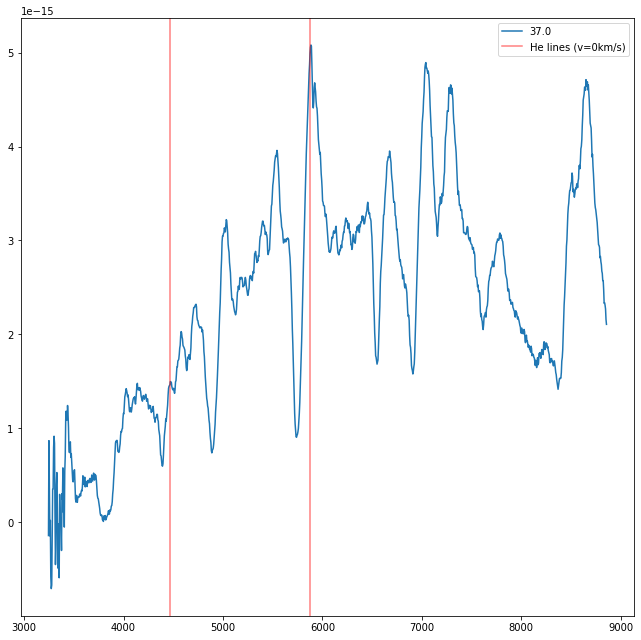

In [25]:
sn2006aj_wave = []
sn2006aj_flux = []
sn2006aj_mjd = []
sn2006aj_peak = time.Time('2008-03-22').mjd
with open('sn2008ax_specs.json', 'r') as f:
    sn2006aj = json.load(f)
    for s in sn2006aj['SN2008ax']['spectra']:
        sn2006aj_mjd.append(float(s[0]))
        wav = []
        flu = []
        for l in s[1]:
            wav.append(float(l[0]))
            flu.append(float(l[1]))
        sn2006aj_wave.append(np.array(wav, dtype=np.double))
        sn2006aj_flux.append(np.array(flu, dtype=np.double))
i = 50
plt.figure(figsize=(11,11))
plt.plot(sn2006aj_wave[i], sn2006aj_flux[i], label='%.1f' % (sn2006aj_mjd[i] - sn2006aj_peak))
for he_line in [5876, 4472]:
    he_v = 0
    z = 1-he_v/300e3
    lbl = None
    if he_line == 5876:
        lbl = 'He lines (v=%dkm/s)' % he_v
    plt.axvline(x=he_line*z, label=lbl, c='red', alpha=0.5)
plt.legend()

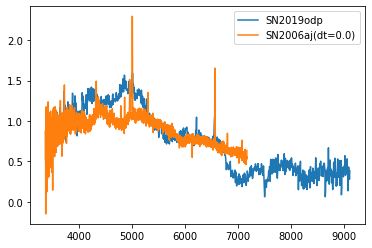

In [54]:
vmin = np.percentile(flux, 70)
plt.plot(wave/(1+redshift), flux/vmin, label='SN2019odp')
for x in [23]:
    #print(sn2006aj_wave[x])
    vmin = np.percentile(sn2006aj_flux[x], 70)
    plt.plot(sn2006aj_wave[x]/(1+0.033023), sn2006aj_flux[x]/vmin, label='SN2006aj(dt=%.1f)' % (sn2006aj_mjd[x] - 53794.00))
plt.legend()

In [16]:
sn2006aj_flux[0]

array([4.39589e-16, 4.19307e-16, 4.83004e-16, ..., 1.18609e-16,
       1.12715e-16, 1.07753e-16])

In [9]:
!ls

2019-11-26-spectral-classification.ipynb
2020-01-14-early-spec-2019-08-23.png
lc_2020-01-14.png
lc_2020-01-14.txt
plot_multi.ipynb
sn2006aj_specs.json
sn98bw_t+3
sn98bw_t+4
sn98bw_t+6
sn98bw_t+8
sn98bw_t+9
tns_2019odp_2019-08-23_05-23-25_ESO-NTT_EFOSC2-NTT_ePESSTO+.asci
